In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from scipy.signal import butter,savgol_filter

In [2]:
# Загрузка файла сфигмограммы из директории проекта
SPG = np.loadtxt('1testSG.txt')
dt = 1000 # Частота с которой снимался сигнал

# Создание массивов времени и амплитуды сигнала
ySPG = SPG - np.mean(SPG)
xSPG = np.arange(len(ySPG))



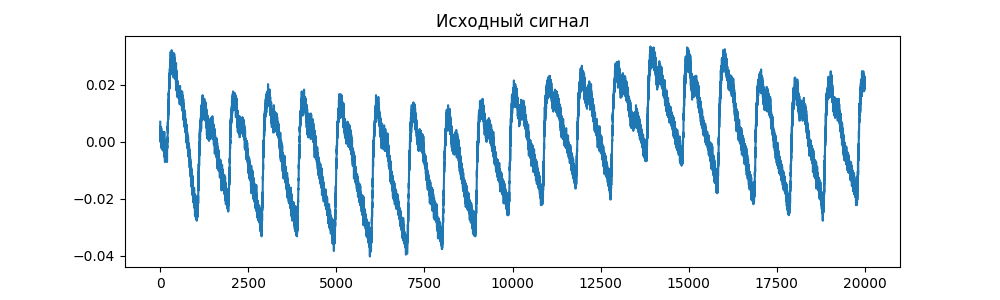

In [3]:
# Построение сырого сигнала
%matplotlib widget
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
ax.set_title('Исходный сигнал')
ax.plot(xSPG, ySPG)
plt.show()

In [4]:
# Фильтрация сигнала
cutSPG = ySPG[11690:12800] # Извлечение одной пульсовой волны

smSPG_1 = uniform_filter1d(cutSPG, size = 20) # Сглаживание окном шириной в 20 точек
smSPG_2 = uniform_filter1d(cutSPG, size = 100) # Сглаживание окном шириной 100 точек
smSPG_3 = uniform_filter1d(cutSPG, size = 200) # Сглаживание окном шириной 200 точек

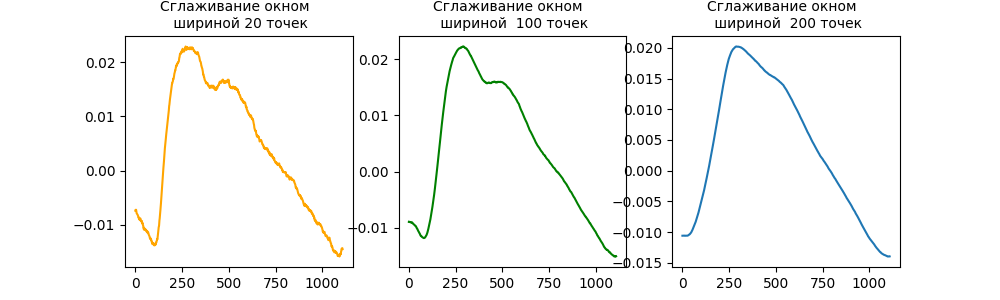

In [5]:
# Построение фильтрованного сигнала
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1,3,1)
ax.set_title("Сглаживание окном  \n шириной 20 точек", size = 10)
ax.plot(smSPG_1, 'orange')
ax = fig.add_subplot(1,3,2)
ax.set_title("Сглаживание окном  \n шириной  100 точeк", size = 10)
ax.plot(smSPG_2, 'g')
ax = fig.add_subplot(1,3,3)
ax.set_title("Сглаживание окном  \n шириной  200 точeк", size = 10)
ax.plot(smSPG_3)
plt.show()

In [6]:
# Сглаживание полного сигнала
smySPG = uniform_filter1d(ySPG, size = 100) # Сглаживание окном шириной в 100 точек
smxSPG = np.arange(len(smySPG))

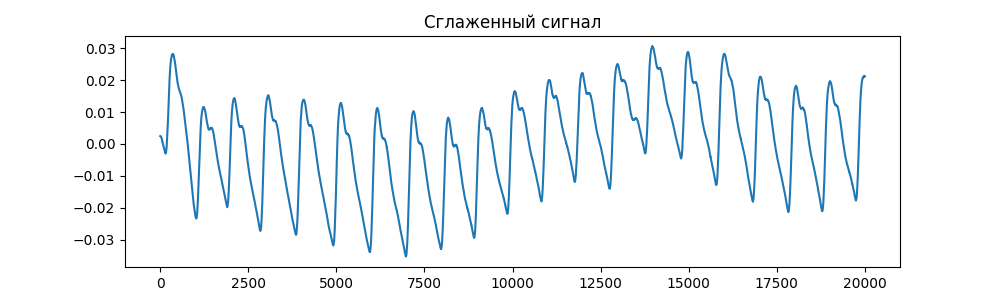

In [7]:
# Построение сглаженного сигнала
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
ax.set_title('Сглаженный сигнал')
ax.plot(smxSPG, smySPG)

plt.show()

In [8]:
# Детрендинг сглаженного сигнала 

trend = uniform_filter1d(smySPG, size = 1000) # Один из подходов к вычислению тренда 
# заключается в  вычисляении как сильно сглаженный исходный сигнал
detrSPG = smySPG - trend # Вычитание из исходного сигнала тренд даёт на выходе детрендированный сигнал

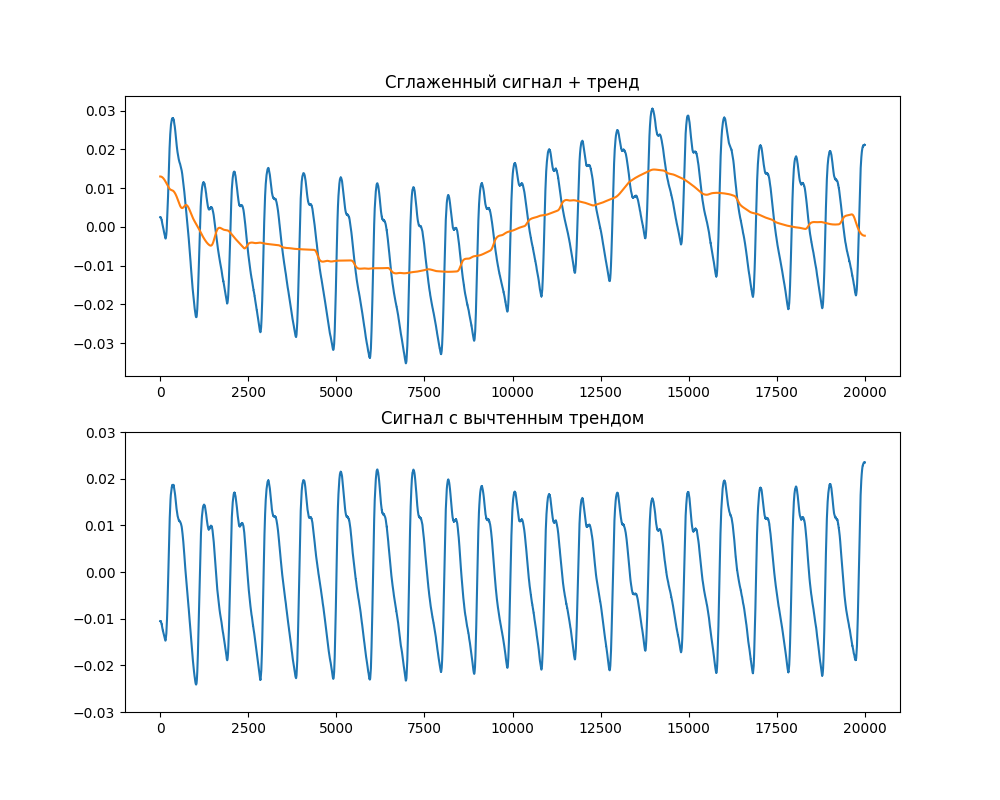

In [9]:
# Построение сглаженного сигнала и его тренда
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(2,1,1)
ax.set_title('Сглаженный сигнал + тренд')
ax.plot( smySPG)
ax.plot( trend)
ax = fig.add_subplot(2,1,2)
ax.set_title('Сигнал с вычтенным трендом')
ax.plot( detrSPG)
ax.set_ylim(-0.03, 0.03)
plt.show()

In [10]:
# Поиск точек максимума и минимума
N = len(detrSPG)-1 # Длина обрабатываемого массива 
Dist = 900 # Предполагаемое расстояние между двумя соседними максимумами
Step = np.floor(N/Dist-1) # Предполагаемое количество кардиоциклов в записи

In [11]:
# Функция поиска максимумов пульсовой волны. На вход подается сглаженная экспериментальная кривая 
# и предполагаемое расстояние между пиками

def MaxPoint(Data_l, dist_l):
    g = 0
    FmaxX = []
    FmaxY = []
    max = 0
    for i in range (dist_l):
        if Data_l[i] > max:
            max = Data_l[i]
            g = i
    G = g
    FmaxX.append(G)
    FmaxY.append(max)
    while G + round(dist_l*1.5) < len(Data_l):
        max = 0
        for j in range(G + round(dist_l * 0.5), G + round(dist_l * 1.5), 1):
            if Data_l[j] > max:
                max = Data_l[j]
                g = j
        G = g
        FmaxX.append(G)
        FmaxY.append(max)
    return FmaxX,FmaxY

In [12]:
# Функция поиска минимумов пульсовой волны. На вход подается сглаженная экспериментальная кривая 
# и предполагаемое расстояние между пиками


In [13]:
# Поиск экстремумов
MaxX, MaxY = np.array(MaxPoint(detrSPG,Dist))
MinX, MinY = np.array(MinPoint(detrSPG,Dist))

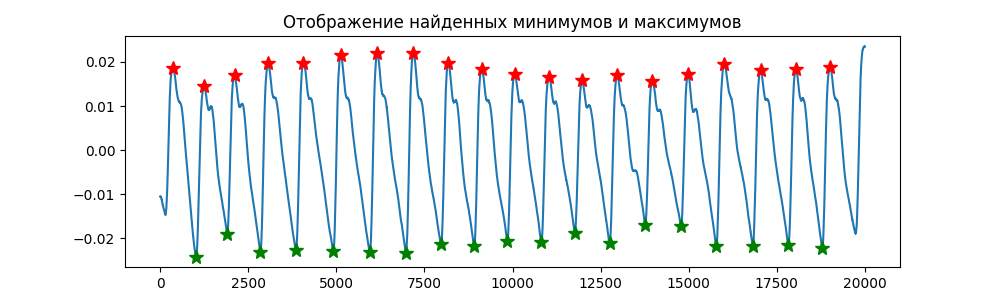

In [14]:
# Отображение максимумов и минимумов экспериментального сигнала
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
ax.set_title('Отображение найденных минимумов и максимумов')
ax.plot(smxSPG, detrSPG)
ax.plot(MaxX,MaxY, 'r*', markersize = 10)
ax.plot(MinX,MinY, 'g*', markersize = 10)
plt.show()

In [15]:
# Оценка количества найденных пульсовых волн
print('В ходе розыскных мероприятий удалось выявить ' + str(len(MaxY)) + ' максимумов и ' + str(len(MinY)) + ' минимумов.'  ) 

В ходе розыскных мероприятий удалось выявить 20 максимумов и 19 минимумов.


In [16]:
# Вычисление и построение графика динамики амплитуды сигнала
# В случае, если максимумов и минимумов получилось не равное количество, нужно откинуть лишние точки
# В имеющемся у нас примере лишним является первый найденный максимум, так как его минимум остался ненайденным

MaxX, MaxY = MaxX[1:], MaxY [1:]
AmpX = ((MinX) - (MaxX))/2 + (MaxX)
AmpY = MaxY - MinY

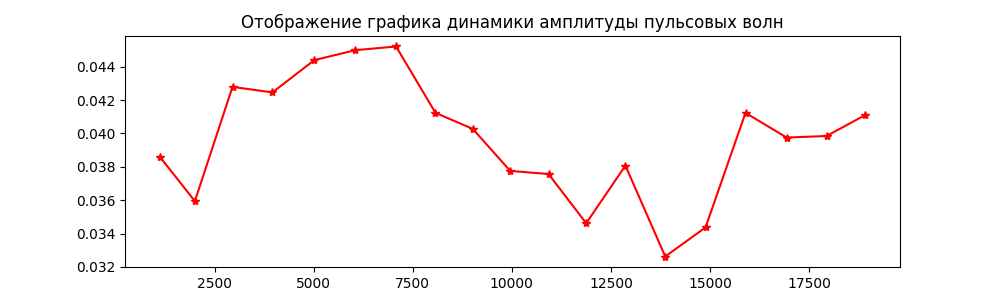

In [17]:
# Отображение графика динамики амплитуды
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
ax.set_title('Отображение графика динамики амплитуды пульсовых волн')
ax.plot(AmpX,AmpY, 'r-*')
plt.show()